Encode categorical
Missing values
Duplicate
outlier (z score, boxplot)
Visualization (univariate bivariate correlation)
Normalize
Classifier(Logstic , SVM)
hyper perameter tuning


In [7]:
import numpy as np
import pandas as pd
read = pd.read_csv(r'C:\Users\SMART TECH\Desktop\ML\tcp\dataset_sdn.csv\dataset_sdn.csv')
print(read)

           dt  switch        src       dst  pktcount  bytecount  dur  \
0       11425       1   10.0.0.1  10.0.0.8     45304   48294064  100   
1       11605       1   10.0.0.1  10.0.0.8    126395  134737070  280   
2       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
3       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
4       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
...       ...     ...        ...       ...       ...        ...  ...   
104340   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104341   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104342   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104343   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104344   5262       3  10.0.0.11  10.0.0.5        31       3038   31   

         dur_nsec       tot_dur  flows  ...  pktrate  Pairflow  Protocol  \
0       716000000  1.010000e+11      3  ...      451       

In [8]:
read = pd.get_dummies(read, columns=['Protocol'])
print(read.head())

      dt  switch       src       dst  pktcount  bytecount  dur   dur_nsec  \
0  11425       1  10.0.0.1  10.0.0.8     45304   48294064  100  716000000   
1  11605       1  10.0.0.1  10.0.0.8    126395  134737070  280  734000000   
2  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
3  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
4  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   

        tot_dur  flows  ...  port_no   tx_bytes  rx_bytes  tx_kbps  rx_kbps  \
0  1.010000e+11      3  ...        3  143928631      3917        0      0.0   
1  2.810000e+11      2  ...        4       3842      3520        0      0.0   
2  2.010000e+11      3  ...        1       3795      1242        0      0.0   
3  2.010000e+11      3  ...        2       3688      1492        0      0.0   
4  2.010000e+11      3  ...        3       3413      3665        0      0.0   

   tot_kbps  label  Protocol_ICMP  Protocol_TCP  Protocol_UDP 

In [9]:
median = read.select_dtypes(include=np.number).median()
read.fillna(median, inplace=True)
print(read.isnull().sum())
print(read.head())

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps          0
tot_kbps         0
label            0
Protocol_ICMP    0
Protocol_TCP     0
Protocol_UDP     0
dtype: int64
      dt  switch       src       dst  pktcount  bytecount  dur   dur_nsec  \
0  11425       1  10.0.0.1  10.0.0.8     45304   48294064  100  716000000   
1  11605       1  10.0.0.1  10.0.0.8    126395  134737070  280  734000000   
2  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
3  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
4  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   

        tot_dur  flows  ...  port_no   tx_bytes  

In [10]:
missing_ratio = read.isnull().sum() / len(read)
columns_to_fill = missing_ratio[(missing_ratio >= 0.10) & (missing_ratio <= 0.15)].index
read[columns_to_fill] = read[columns_to_fill].fillna(read[columns_to_fill].median())
print("Columns filled with missing ratio between 10% and 15%:\n", columns_to_fill)
print("Missing values after fill:\n", read[columns_to_fill].isnull().sum())

Columns filled with missing ratio between 10% and 15%:
 Index([], dtype='object')
Missing values after fill:
 Series([], dtype: float64)


In [ ]:
# read[['Protocol_ICMP', 'Protocol_TCP', 'Protocol_UDP']] = read[['Protocol_ICMP', 'Protocol_TCP', 'Protocol_UDP']].fillna(False)
# print(read.isnull().sum())

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps          0
tot_kbps         0
label            0
Protocol_ICMP    0
Protocol_TCP     0
Protocol_UDP     0
dtype: int64


In [11]:
duplicates = read[read.duplicated()]
print("Duplicate rows:\n", duplicates)

read = read.drop_duplicates()
print("Dataframe after removing duplicates:\n", read)

Duplicate rows:
           dt  switch        src       dst  pktcount  bytecount  dur  \
13     11425       1   10.0.0.1  10.0.0.8     45304   48294064  100   
15     11425       1   10.0.0.1  10.0.0.8     45304   48294064  100   
30     11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
34     11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
40     11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
...      ...     ...        ...       ...       ...        ...  ...   
33474   3249       8  10.0.0.12  10.0.0.5     88782   94641612  197   
33501   3609       8   10.0.0.3  10.0.0.5    119500  124519000  407   
33512   3609       8   10.0.0.3  10.0.0.5    119500  124519000  407   
33559   3159       8  10.0.0.12  10.0.0.5     48292   51479272  107   
33584   3249       8   10.0.0.3  10.0.0.5     14973   15601866   47   

        dur_nsec       tot_dur  flows  ...  port_no   tx_bytes   rx_bytes  \
13     716000000  1.010000e+11      3  ...        4  

In [12]:
outliers = read.select_dtypes(include=np.number).apply(lambda x: np.abs(x - x.median()) / x.std() > 3)
# print("Outliers:\n", outliers)

print("Outliers per column:\n", outliers.sum())

Outliers per column:
 dt                0
switch          646
pktcount       1268
bytecount         0
dur            1456
dur_nsec          0
tot_dur        1456
flows          1045
packetins      2512
pktperflow      188
byteperflow     140
pktrate         188
Pairflow          0
port_no           0
tx_bytes       3524
rx_bytes       3319
tx_kbps        4145
rx_kbps        3637
tot_kbps       4561
label             0
dtype: int64


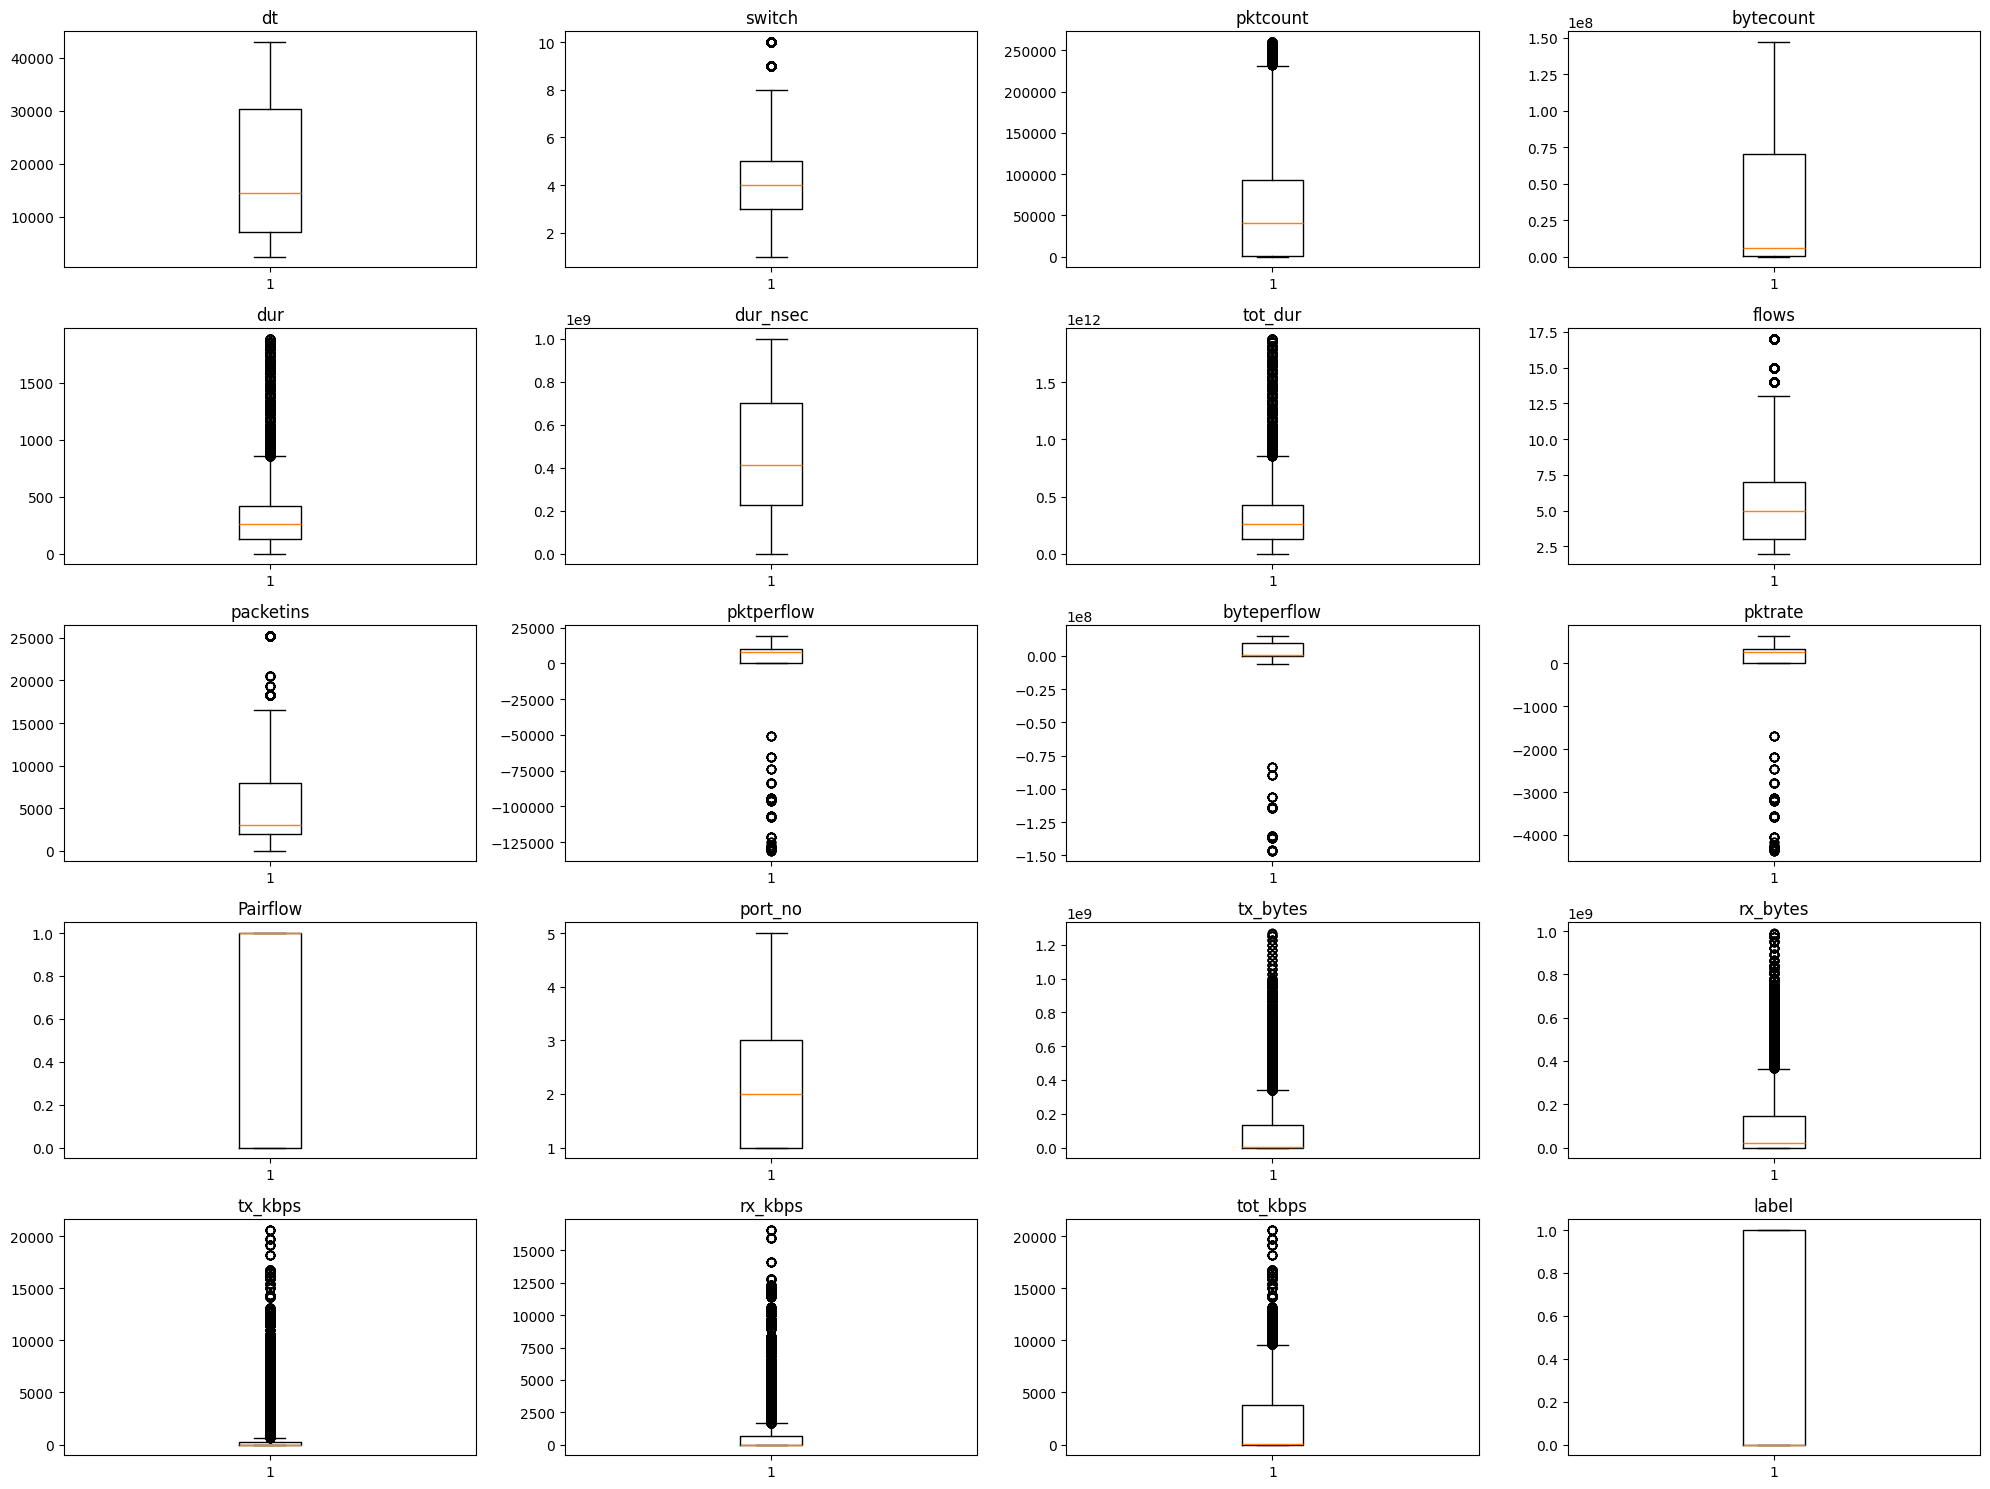

In [13]:
import matplotlib.pyplot as plt
numerical_columns = read.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    plt.boxplot(read[column])
    plt.title(column)

plt.tight_layout()
plt.show()

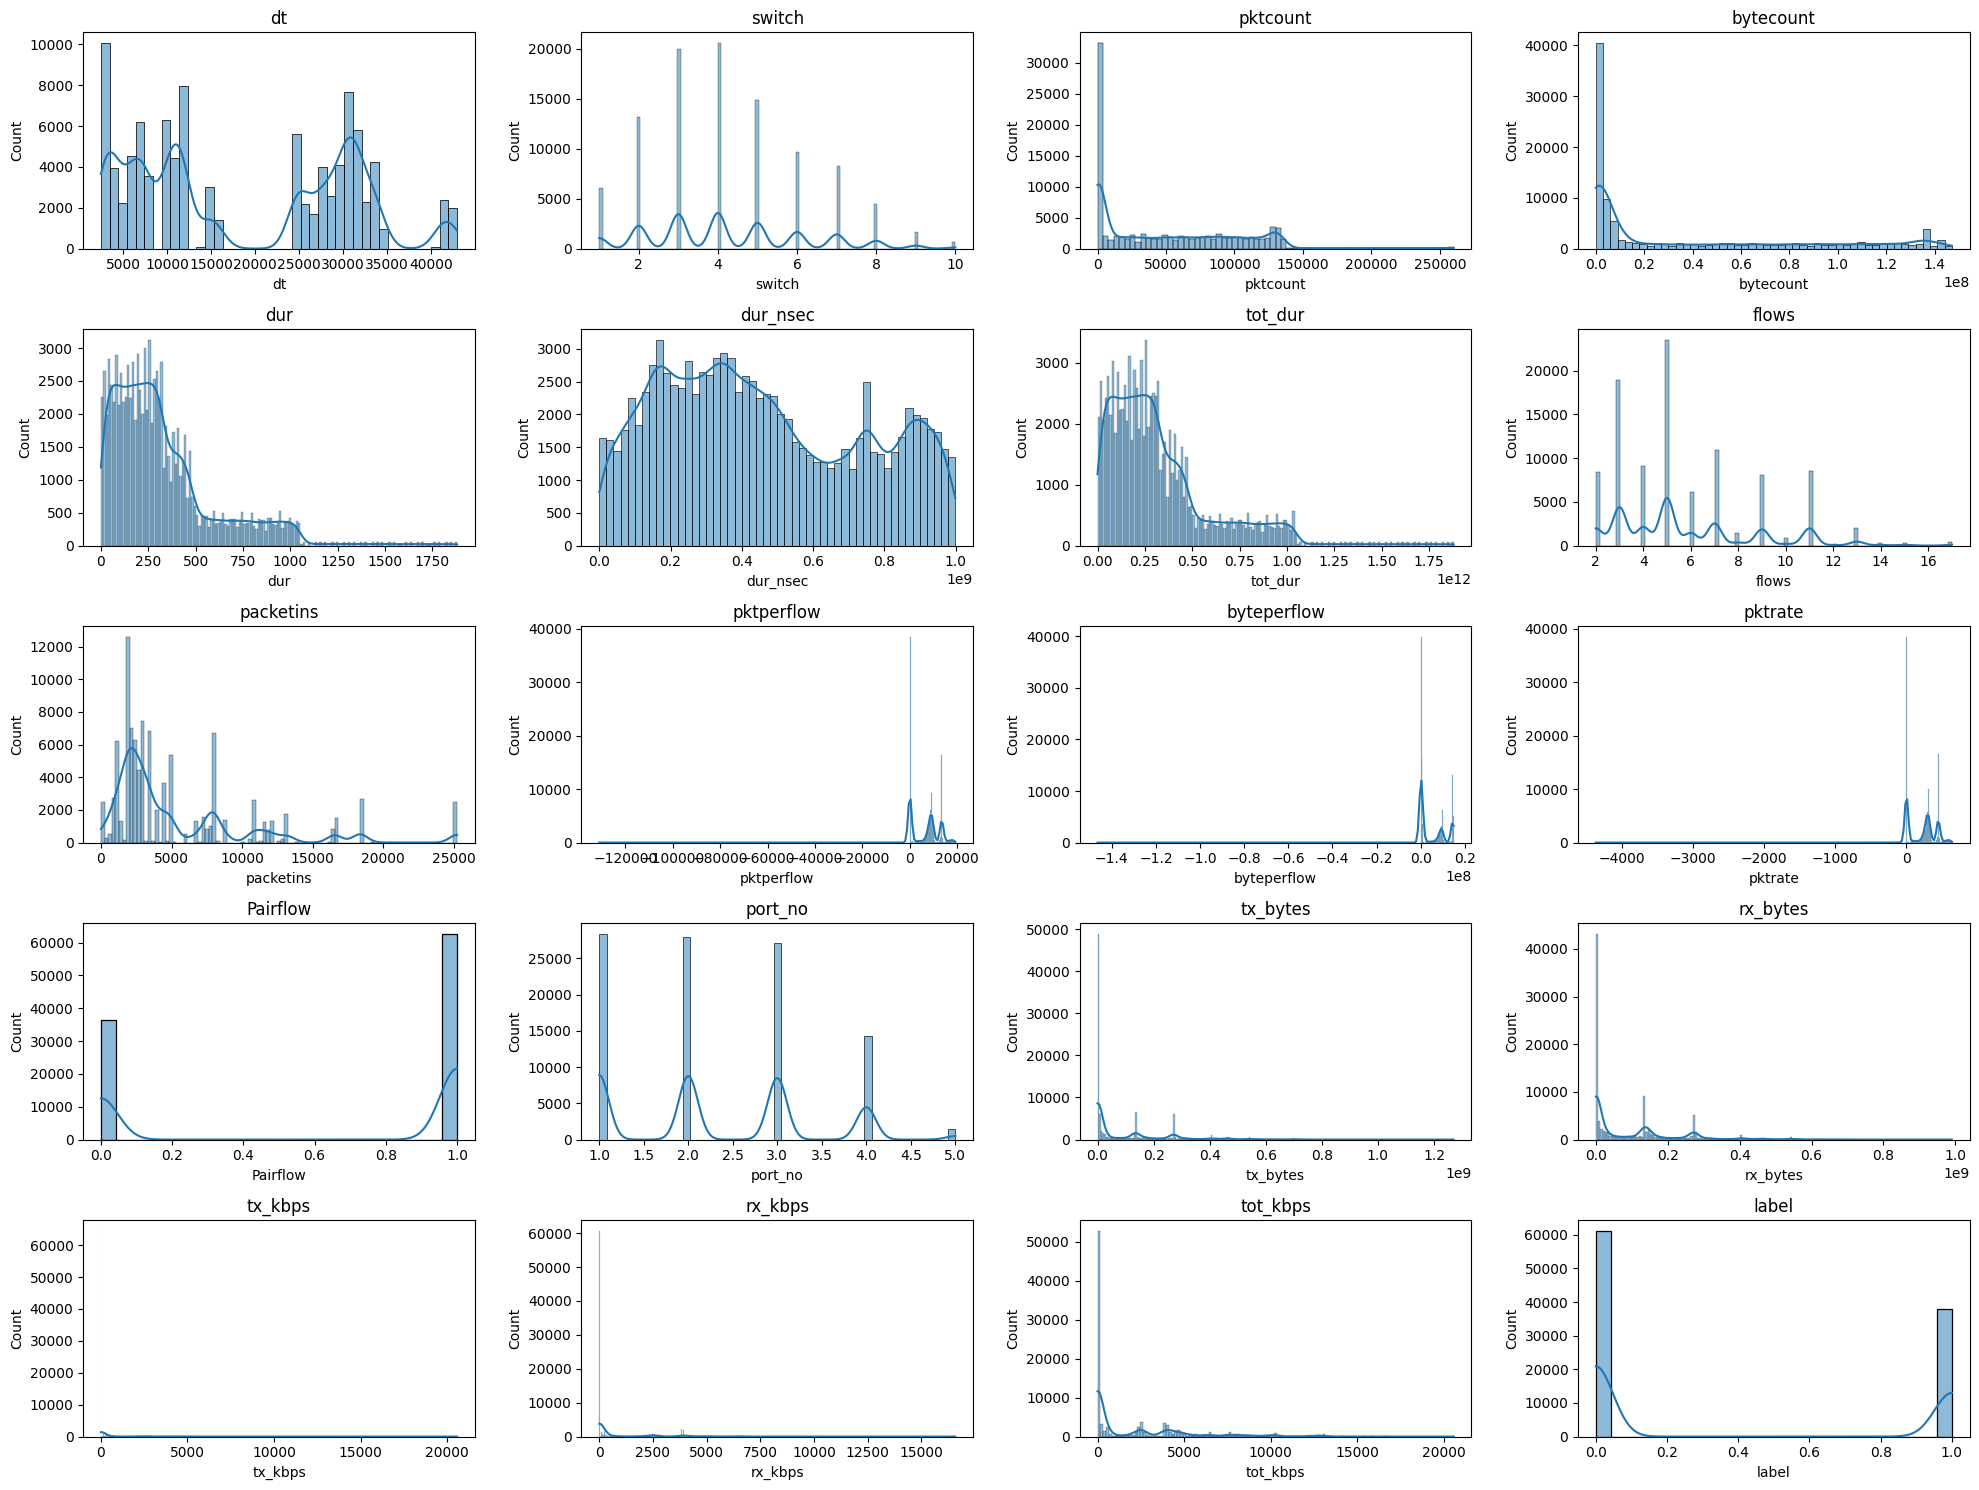

In [14]:
import seaborn as sns

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(read[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()


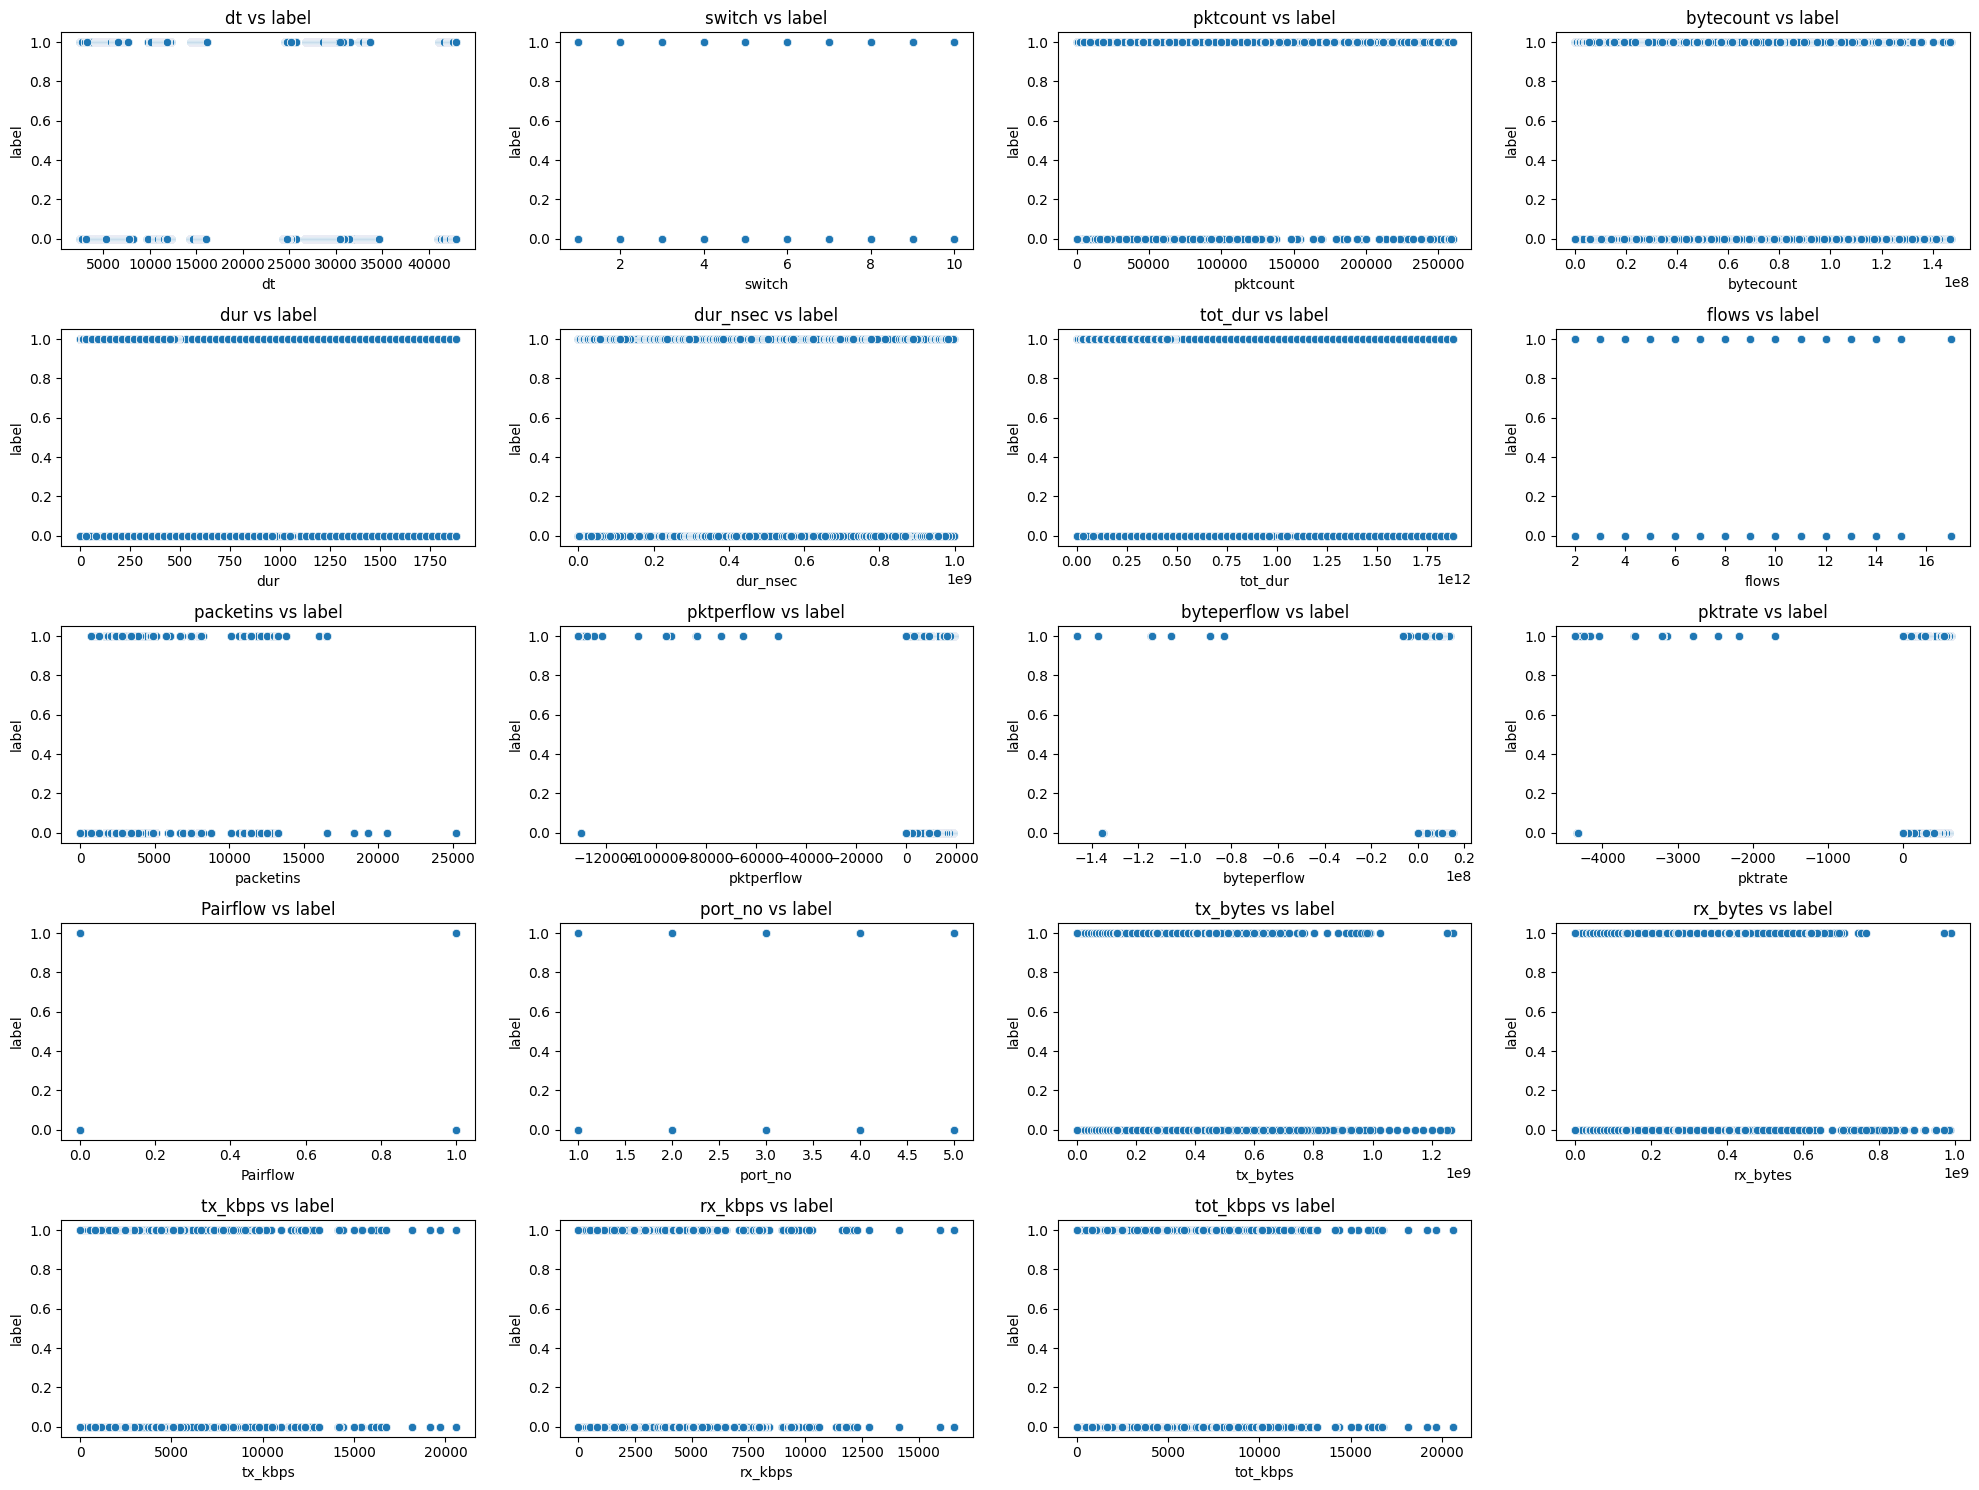

In [15]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    if column != 'label':
        plt.subplot(5, 4, i)
        sns.scatterplot(x=read[column], y=read['label'])
        plt.title(f'{column} vs label')

plt.tight_layout()
plt.show()


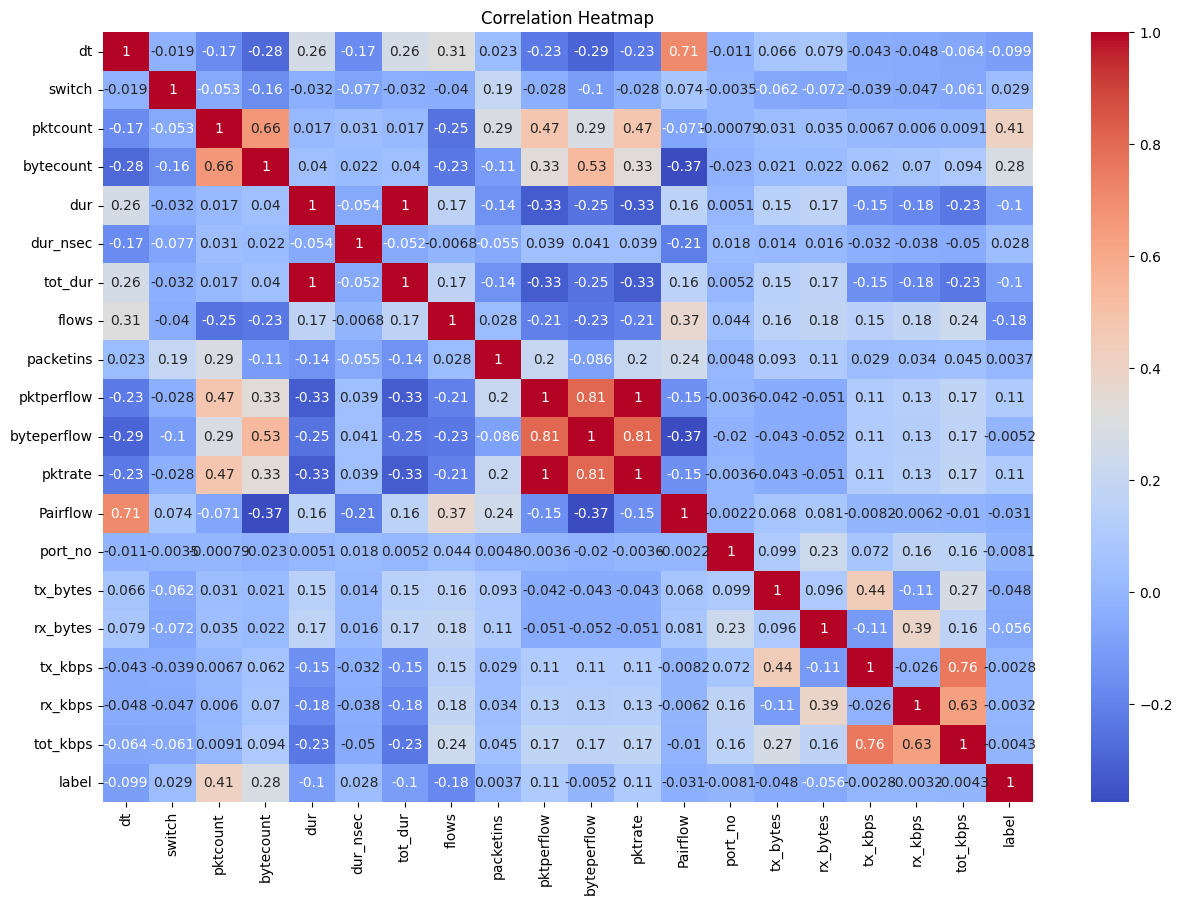

In [16]:
plt.figure(figsize=(15, 10))
correlation_matrix = read[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
read[numerical_columns] = scaler.fit_transform(read[numerical_columns])
print(read.head())

         dt    switch       src       dst  pktcount  bytecount       dur  \
0 -0.578287 -1.648669  10.0.0.1  10.0.0.8 -0.128336   0.245724 -0.793499   
1 -0.563367 -1.648669  10.0.0.1  10.0.0.8  1.419230   2.032347 -0.167888   
2 -0.578287 -1.648669  10.0.0.2  10.0.0.8  0.731011   1.237818 -0.445937   
3 -0.578287 -1.648669  10.0.0.2  10.0.0.8  0.731011   1.237818 -0.445937   
4 -0.578287 -1.648669  10.0.0.2  10.0.0.8  0.731011   1.237818 -0.445937   

   dur_nsec   tot_dur     flows  ...   port_no  tx_bytes  rx_bytes   tx_kbps  \
0  0.924294 -0.791684 -0.930976  ...  0.629738  0.305022 -0.724892 -0.419655   
1  0.988968 -0.165819 -1.268077  ...  1.555080 -0.631768 -0.724895 -0.419655   
2  1.024898 -0.443981 -0.930976  ... -1.220945 -0.631768 -0.724912 -0.419655   
3  1.024898 -0.443981 -0.930976  ... -0.295603 -0.631769 -0.724910 -0.419655   
4  1.024898 -0.443981 -0.930976  ...  0.629738 -0.631770 -0.724894 -0.419655   

    rx_kbps  tot_kbps     label  Protocol_ICMP  Protocol_TCP  

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import KBinsDiscretizer

X = read.drop(columns=['label', 'src', 'dst'])
y = read['label']

kbins = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
y_binned = kbins.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.7684247644954915
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.84      0.82     12341
         1.0       0.71      0.65      0.68      7510

    accuracy                           0.77     19851
   macro avg       0.76      0.75      0.75     19851
weighted avg       0.77      0.77      0.77     19851



In [19]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9695733212432623
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     12341
         1.0       0.95      0.97      0.96      7510

    accuracy                           0.97     19851
   macro avg       0.97      0.97      0.97     19851
weighted avg       0.97      0.97      0.97     19851



i have run this 3 hours it take more time due large data and complexity

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}
# Create a GridSearchCV object
random_search = RandomizedSearchCV(SVC(), param_grid, n_iter=20, cv=3, verbose=2, random_state=42)
# Fit the grid search to the data
random_search.fit(X_train, y_train)
# Print the best parameters and estimator
print("Best Parameters:", random_search.best_params_)
print("Best Estimator:", random_search.best_estimator_)
# Predict using the best estimator
y_pred_grid = random_search.predict(X_test)
print("Grid Search SVM Accuracy:", accuracy_score(y_test, y_pred_grid))
print("Grid Search SVM Classification Report:\n", classification_report(y_test, y_pred_grid))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


It reduces the computational complexity of hyperparameter tuning by minimizing model evaluations (via early stopping and parallelism), making the process faster without sacrificing accuracy.

In [ ]:
import numpy as np
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import accuracy_score, classification_report

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': np.logspace(-2, 2, 5),         # [0.01, 0.1, 1, 10, 100]
    'gamma': ['scale', 0.1, 0.01],      # 'scale' auto-calculates based on data
    'kernel': ['rbf', 'linear']         # Focus on common kernels
}

# Use HalvingRandomSearchCV for faster search (early stopping)
halving_search = HalvingRandomSearchCV(
    SVC(),
    param_grid,
    factor=2,            # Reduce candidates by half at each iteration
    cv=3,                # 3-fold cross-validation (faster than 5-fold)
    n_jobs=-1,           # Use all CPU cores for parallel processing
    random_state=42,     # Ensure reproducibility
    verbose=1            # Monitor progress
)

halving_search.fit(X_train_scaled, y_train)

print("Best Parameters:", halving_search.best_params_)
print("Best Estimator:", halving_search.best_estimator_)
y_pred = halving_search.predict(X_test_scaled)
print("Optimized SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 13
min_resources_: 12
max_resources_: 79403
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 30
n_resources: 12
Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\SMART TECH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 30 is smaller than n_iter=6616. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 15
n_resources: 24
Fitting 3 folds for each of 15 candidates, totalling 45 fits
----------
iter: 2
n_candidates: 8
n_resources: 48
Fitting 3 folds for each of 8 candidates, totalling 24 fits
----------
iter: 3
n_candidates: 4
n_resources: 96
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 4
n_candidates: 2
n_resources: 192
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 0.01, 'C': np.float64(100.0)}
Best Estimator: SVC(C=np.float64(100.0), gamma=0.01)
Optimized SVM Accuracy: 0.9757694826457105
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     12341
         1.0       0.96      0.98      0.97      7510

    accuracy                           0.98     19851
   macro avg       0.97      0.98      0.97     19851
weighted avg       0.98      0.98      0.98     19851



Total data read:
(99254, 25)

Data size after removing missing values and duplicates:
(99254, 25)

Data count after removing outliers:
(80185, 25)
1. Data Overview:
    - The dataset contains 104345 rows and 23 columns.
    - The columns include various network metrics such as 'dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'Protocol_ICMP', 'Protocol_TCP', 'Protocol_UDP', and 'label'.

2. Data Preprocessing:
    - Categorical encoding: The 'Protocol' column was encoded using one-hot encoding.
    - Missing values: Numerical columns were filled with their median values. Columns with missing ratios between 10% and 15% were also filled with their median values.
    - Duplicate rows: Duplicate rows were identified and removed.
    - Outliers: Outliers were detected using the z-score method.

3. Data Visualization:
    - Univariate analysis: Boxplots and histograms were used to visualize the distribution of numerical columns.
    - Bivariate analysis: Scatter plots were used to visualize the relationship between numerical columns and the 'label' column.
    - Correlation analysis: A heatmap was used to visualize the correlation matrix of numerical columns.

4. Data Normalization:
    - The numerical columns were normalized using StandardScaler for better performance and faster convergence of machine learning models.

5. Classification:
    - Logistic Regression and SVM classifiers were trained on the dataset.
    - Hyperparameter tuning was performed using GridSearchCV and HalvingRandomSearchCV to find the best parameters for the SVM model.

6. Model Performance:
    - Logistic Regression achieved an accuracy of 0.7684247644954915.
    - SVM achieved an accuracy of 0.9695733212432623.
    - The optimized SVM model achieved an accuracy of 0.9757694826457105 after hyperparameter tuning.